In [45]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from scipy.stats import mode

import warnings

# Filter out warnings
warnings.filterwarnings("ignore")

In [14]:
main_folder_path = '../dataset/'

subfolders = [f.path for f in os.scandir(main_folder_path) if f.is_dir() and "20231207" in f.name and "tbl_AR41" in f.name]
subfolders

['../dataset/tbl_AR41_train107_20231207',
 '../dataset/tbl_AR41_train131_20231207',
 '../dataset/tbl_AR41_train136_20231207',
 '../dataset/tbl_AR41_train172_20231207',
 '../dataset/tbl_AR41_train181_20231207',
 '../dataset/tbl_AR41_train194_20231207']

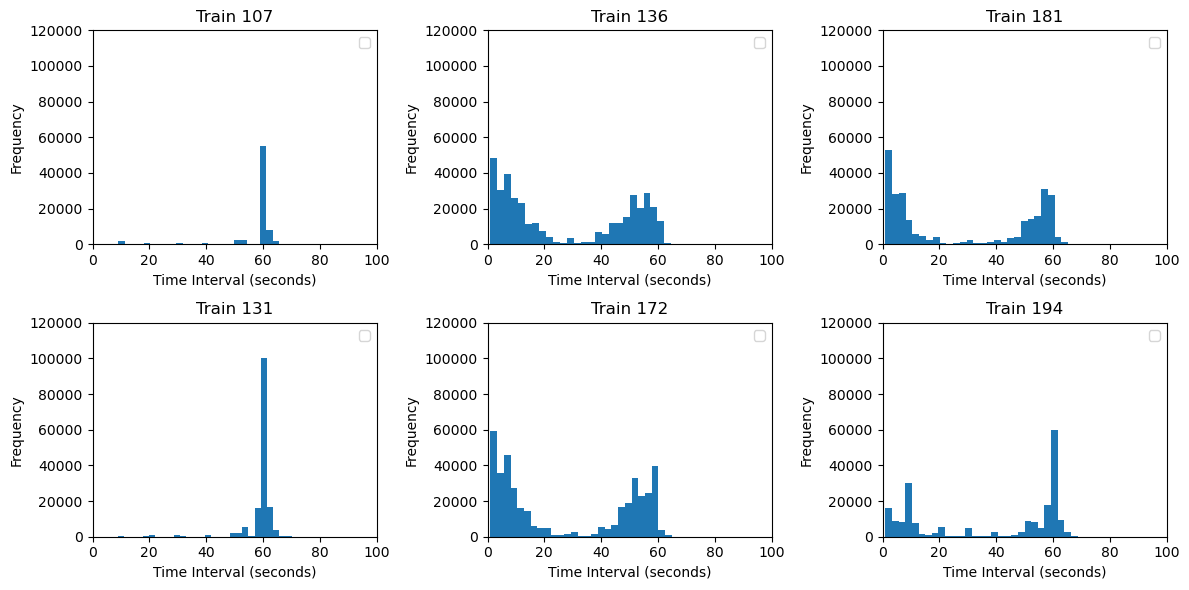

<Figure size 640x480 with 0 Axes>

In [52]:
trains_new_dataset = [107, 131, 136, 172, 181, 194]

date_string = '20231207'

subfolders = [f.path for f in os.scandir(main_folder_path) if f.is_dir() and date_string in f.name and "tbl_AR41" in f.name]

# Create a 3x2 grid of histograms
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

for jj, subfolder in enumerate(subfolders):
    files = [f.path for f in os.scandir(subfolder) if f.is_file()]
    file_path = files[0]
    raw_data = pd.read_csv(file_path, sep=';')
    raw_timestamps = raw_data['timestamps_UTC']
    intervals = pd.to_datetime(raw_timestamps).diff()
    
    intervals = intervals[intervals.dt.total_seconds() < 150]

    # Index axs using jj to get the correct subplot
    ax = axs[jj % 2,jj // 2]
    
    # Set x-axis range
    ax.set_xlim(0, 100)  # Adjust the range as needed
    
    # Set y-axis range
    ax.set_ylim(0, 120000)  # Adjust the range as needed

    n, bins, patches = ax.hist(intervals.dt.total_seconds(), bins=60, label=f'Train {trains_new_dataset[jj]}')
    ax.set(xlabel='Time Interval (seconds)', ylabel='Frequency')
    ax.legend()
    
    # Calculate mode(s)
    calc_mode = False
    if calc_mode:
        modes = mode(intervals.dt.total_seconds()).mode

        # Display mode(s) as vertical line(s)
        for mode_val in modes:
            ax.axvline(mode_val, color='red', linestyle='dashed', linewidth=2)

        # Annotate if there is more than one mode
        if len(modes) > 1:
            ax.text(0.5, 0.95, f'Multiple Modes', color='red', transform=ax.transAxes, ha='center', va='center', alpha=0.2)

    # Set title instead of legend
    ax.set_title(f'Train {trains_new_dataset[jj]}')
    
    # Remove the legend
    ax.legend([])
    
# Adjust layout
plt.tight_layout()
plt.show()

plt.savefig('../figures/distribution_time_intervals.png') 


In [3]:
train107 = pd.read_csv('../dataset/tbl_AR41_train107_20231207/tbl_AR41 - Train 107 - 2023-12-07.csv', sep=';')
train107

C:\Users\mouli\AppData\Local\Temp\ipykernel_22352\941502115.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  train107 = pd.read_csv('../dataset/tbl_AR41_train107_20231207/tbl_AR41 - Train 107 - 2023-12-07.csv', sep=';')


,id,vehicle_id,timestamps_UTC,Insert_Datetime,lat,lon,temperature,elevation,precipitations,snow_height,...,RS_E_InAirTemp_Delta_Percent,RS_E_OilPress_Delta,RS_E_OilPress_Delta_Percent,RS_E_RPM_Delta,RS_E_RPM_Delta_Percent,RS_E_WatTemp_Delta,RS_E_WatTemp_Delta_Percent,RS_T_OilTemp_Delta,RS_T_OilTemp_Delta_Percent,Is_Meteo_Retrieved
0,7811197,107,2023-01-20 15:43:49.000,2023-11-06 14:48:39.443,50.400561,4.459116,"-1,958499908",100,0,"0,01",...,"31,81818182",3,100,0,NaN,27,"45,76271186",3,"5,660377358",1
1,6998589,107,2023-01-25 16:29:48.000,2023-11-06 14:48:39.443,50.400481,4.459390,"-2,808500051",100,0,"0,029999999",...,50,"296,5","50,16920474",404,"50,59486537","10,5","72,4137931",1,"6,896551724",1
2,16304463,107,2023-01-25 16:29:57.000,2023-11-06 14:48:39.443,50.400331,4.459128,"-2,808500051",100,0,"0,029999999",...,100,"580,5",100,800,100,15,100,2,"13,79310345",1
3,5884362,107,2023-01-25 16:30:07.000,2023-11-06 14:48:39.443,50.400367,4.458966,"-2,808500051",100,0,"0,029999999",...,100,576,100,802,100,16,100,1,"7,692307692",1
4,9597489,107,2023-01-25 16:30:28.000,2023-11-06 14:48:39.443,50.400371,4.458953,"-2,808500051",100,0,"0,029999999",...,"9,090909091",570,"98,95833333",800,100,8,50,1,"7,142857143",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76844,8493676,107,2023-09-13 14:58:13.000,2023-11-06 14:48:39.443,50.399393,4.462095,"17,73500061",101,0,0,...,"6,666666667",76,"21,4084507",2,"0,25",20,"27,39726027",0,0,1
76845,11101463,107,2023-09-13 14:59:16.000,2023-11-06 14:48:39.443,50.399099,4.463321,"17,73500061",101,0,0,...,"3,333333333",82,"23,36182336",3,"0,37593985",21,"28,37837838",1,"1,449275362",1
76846,12554437,107,2023-09-13 15:00:15.000,2023-11-06 14:48:39.443,50.399107,4.463258,"17,73500061",101,0,0,...,"3,225806452",82,"23,36182336",3,"0,374531835",22,"29,33333333",1,"1,470588235",1
76847,3780291,107,2023-09-13 15:01:15.000,2023-11-06 14:48:39.443,50.399088,4.463259,"17,73500061",101,0,0,...,0,72,"21,1143695",2,"0,250312891",23,"30,26315789",4,"5,714285714",1


In [21]:
pd.to_datetime(train107['timestamps_UTC']).diff()

0                   NaT
1       5 days 00:45:59
2       0 days 00:00:09
3       0 days 00:00:10
4       0 days 00:00:21
              ...      
76844   0 days 00:01:00
76845   0 days 00:01:03
76846   0 days 00:00:59
76847   0 days 00:01:00
76848   0 days 00:01:01
Name: timestamps_UTC, Length: 76849, dtype: timedelta64[ns]